# EDA OF STUDENT TEST DATASET


## Problem Statement 
#### This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity,Parental level of education, Lunch and Test preparation course.

## Data Collection
#### Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
#### data consists of 8 columns and 1000 rows


#### Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import csv dataset as pandas dataframe

In [5]:
df = pd.read_csv("data/stud.csv")

#### Show top 5 records

df.head()

#### Shape of the dataset

df.shape

#### Display first 10 records

In [6]:
print(df.head(10))  # Shows first 10 rows


   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

#### Display last 10 rows

In [7]:

print(df.tail(10))  # Shows last 10 rows


     gender race_ethnicity parental_level_of_education         lunch  \
990    male        group E                 high school  free/reduced   
991  female        group B            some high school      standard   
992  female        group D          associate's degree  free/reduced   
993  female        group D           bachelor's degree  free/reduced   
994    male        group A                 high school      standard   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
990               completed          86             81             75  
991               completed          65             82         

#### Dataset Information
##### 1  gender - male/female
##### 2  race_ethnicity - groups from A to D
##### 3  parental_level_of_education - some college, high school, bachelor's degree, master's degree
##### 3   lunch                      - having lunch before test (standard or reduced)
##### 4   test_preparation_course    - completed or not completed 
##### 5   math_score                  
##### 6   reading_score               
##### 7   writing_score 


## Data Checks to Perform

#### 1 Check missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values

#### 1.1 Visualising the missing values with graph

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

#### Check for duplicate rows

In [9]:

duplicate_rows = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_rows}")

Total Duplicate Rows: 0


##### There are no duplicate values

#### Check data types

In [10]:

print("Column Data Types:")
print(df.dtypes)

Column Data Types:
gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


In [11]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### No. of unique values in each column

In [12]:
unique_counts = df.nunique()
print(unique_counts)

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64


#### Check various categories present in the categorical columns

In [13]:
# Selecting categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Printing results
print(f"Total categorical variables: {len(categorical_vars)}")
print("Categorical variables:", categorical_vars)

print(f"Total numerical variables: {len(numerical_vars)}")
print("Numerical variables:", numerical_vars)



Total categorical variables: 5
Categorical variables: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Total numerical variables: 3
Numerical variables: ['math_score', 'reading_score', 'writing_score']


In [14]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print unique categories for each categorical column
for col in categorical_cols:
    print(f"Categories in '{col}':")
    print(df[col].unique())
    print("-" * 50)  # for the dotted line 

Categories in 'gender':
['female' 'male']
--------------------------------------------------
Categories in 'race_ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------
Categories in 'parental_level_of_education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------
Categories in 'lunch':
['standard' 'free/reduced']
--------------------------------------------------
Categories in 'test_preparation_course':
['none' 'completed']
--------------------------------------------------


#### Finds the Statistics of the dataset

In [15]:
print(df.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [16]:
print("Statistical Summary of Categorical Columns:\n")
print(df.describe(include=['object', 'category']))

Statistical Summary of Categorical Columns:

        gender race_ethnicity parental_level_of_education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test_preparation_course  
count                     1000  
unique                       2  
top                       none  
freq                       642  


In [17]:
print("Full Dataset Statistics: both Numerical & Categorical Columns:\n")
print(df.describe(include='all'))

Full Dataset Statistics: both Numerical & Categorical Columns:

        gender race_ethnicity parental_level_of_education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test_preparation_course  math_score  reading_score  writing_score  
count   

#### Explore Dataset to see the Independent(feature variables) and Dependent(target, to be predicted) variables

#### Adding columns for "Total Score" and "Average"

In [18]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
#### Students who have got full marks in each sujects

In [20]:
reading_full = df[df['reading_score'] == 100]['Average'].count()  # used when students with both reading_score == 100 and a valid 'Average' score, use .count()
writing_full = df[df['writing_score'] == 100]['Average'].count()  # used when students with both reading_score == 100 and a valid 'Average' score, use .count()
math_full = df[df['math_score'] == 100]['Average'].count()  # used when students with both reading_score == 100 and a valid 'Average' score, use .count()

print(f"Number of Students with full marks in Reading : {reading_full}")
print(f"Number of Students with full marks in Writing : {writing_full}")
print(f"Number of Students with full marks in Math : {math_full}")

Number of Students with full marks in Reading : 17
Number of Students with full marks in Writing : 14
Number of Students with full marks in Math : 7


In [21]:
count_students = (df['reading_score'] == 100).sum() # used If you want to count all students who got 100 in reading, even if their 'Average' is missing, use .sum()

print(f"Number of Students with full marks in Reading : {count_students}")

Number of Students with full marks in Reading : 17


In [22]:
reading_less = df[df['reading_score'] <=20]['Average'].count()  # used when students with both reading_score == 100 and a valid 'Average' score, use .count()
writing_less = df[df['writing_score'] <=20]['Average'].count()  # used when students with both reading_score == 100 and a valid 'Average' score, use .count()
math_less = df[df['math_score'] <=20]['Average'].count()  # used when students with both reading_score == 100 and a valid 'Average' score, use .count()

print(f"Number of Students with less marks in Reading : {reading_less}")
print(f"Number of Students with less marks in Writing : {writing_less}")
print(f"Number of Students with less marks in Math : {math_less}")

Number of Students with less marks in Reading : 1
Number of Students with less marks in Writing : 3
Number of Students with less marks in Math : 4


### Insights:
#### Students performed best in reading and worst in Maths

# Exploring Data (Visualization)

## 1. Visulaize average score distribution

### Histogram 
### KDE (Kernel Distribution Function)

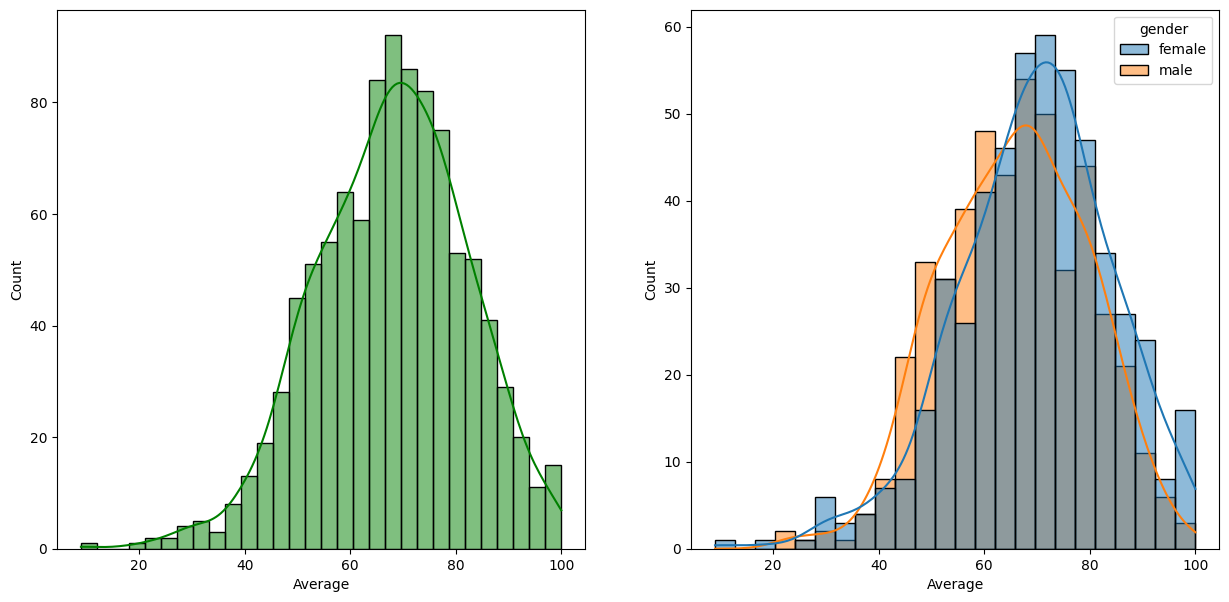

In [23]:
# visuals on the basis of average
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average', kde=True, hue='gender')
plt.show()

### Insights:
#### from above visuals we can see that Female Students tend to perform well than male students. 

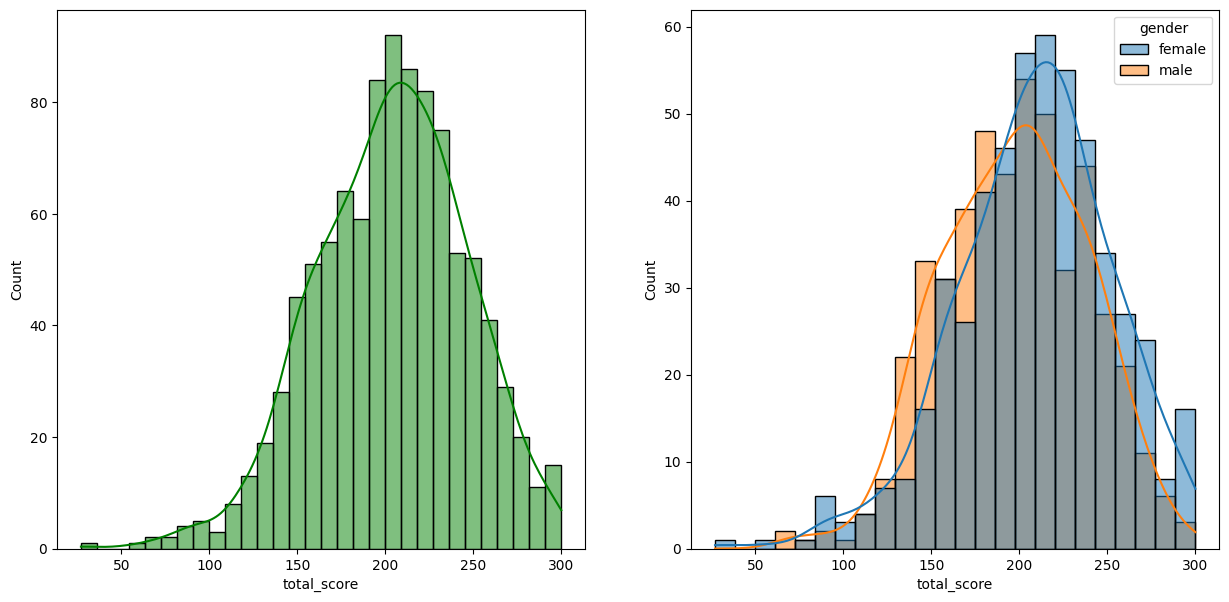

In [24]:
# visuals on the basis of total_score
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score', kde=True, hue='gender')
plt.show()

### Insights 
#### The KDE peaks (modes) show:

#####  Females: Slightly higher typical total scores (~220+).

#####  Males: More students clustered around slightly lower scores (~190–200).

### Now to check how parental_level_of_education, lunch, and test_preparation_course affect total_score or Average, we can use two ways: 
### 1) grouped visualizations and descriptive statistics : Detailed summary & report
### 2) Boxplot : it gives Quick visual comparison of the data
#### so we'll use both

In [29]:
# Average score by parental level of education
df.groupby('parental_level_of_education')[['total_score', 'Average']].mean().sort_values(by='Average', ascending=False)


,total_score,Average
parental_level_of_education,,
master's degree,220.796610,73.598870
bachelor's degree,215.771186,71.923729
associate's degree,208.707207,69.569069
some college,205.429204,68.476401
some high school,195.324022,65.108007
high school,189.290816,63.096939


### Insights 
#### We see a steady decrease in the average scores as the parental education level drops. 
#### This suggests a strong positive influence of parental education on students’ academic performance.

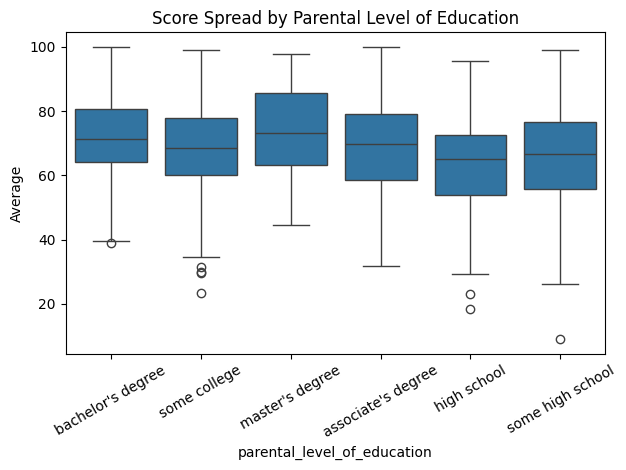

In [31]:
sns.boxplot(data=df, x='parental_level_of_education', y='Average')
plt.title("Score Spread by Parental Level of Education")
plt.xticks(rotation=30)  # Rotate x-axis labels for readability
plt.tight_layout()       # Optional: adjusts subplot params for better fit
plt.show()


### Insights
#### Median Trends:

    The median average score increases with higher parental education.

    Students whose parents have a master's degree show the highest median score.

#### Score Distribution:

    All categories show a wide range, but:

        Lower education groups (e.g., some high school, high school) show more spread and outliers toward the lower end.

        Higher education groups show tighter and higher distributions (less variation in low scores).

#### Outliers:

    Students from less-educated households have more outliers on the lower end, indicating underperforming students are more frequent here.



In [33]:
# Average score by test_preparation_course
df.groupby('test_preparation_course')[['total_score', 'Average']].mean()


,total_score,Average
test_preparation_course,,
completed,218.008380,72.669460
none,195.116822,65.038941


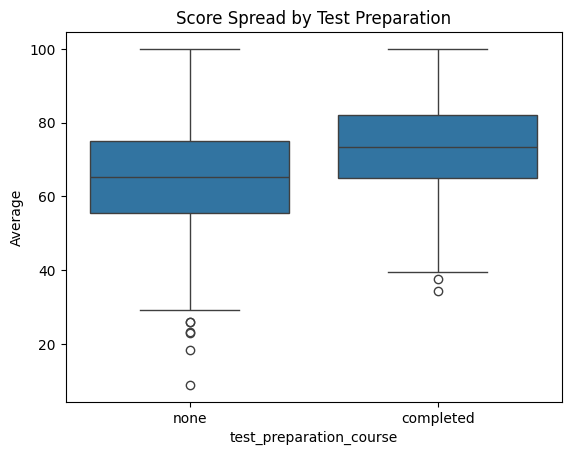

In [26]:
sns.boxplot(data=df, x='test_preparation_course', y='Average')
plt.title("Score Spread by Test Preparation")
plt.show()


### Insights 
#### Higher Median: The median for students who completed the course is higher, supporting the idea that prep helps most students.
#### Less Lower Outliers: Students who didn’t take the prep course show more outliers on the lower end, indicating more students performed poorly.

### Overall Observation:

 #### Completed group: Scores are more concentrated toward higher values.

 #### None group: Scores are more spread out, with a larger lower tail.

In [45]:
# Average score by Type of Lunch
df.groupby('lunch')[['total_score', 'Average']].mean()


,total_score,Average
lunch,,
free/reduced,186.597183,62.199061
standard,212.511628,70.837209


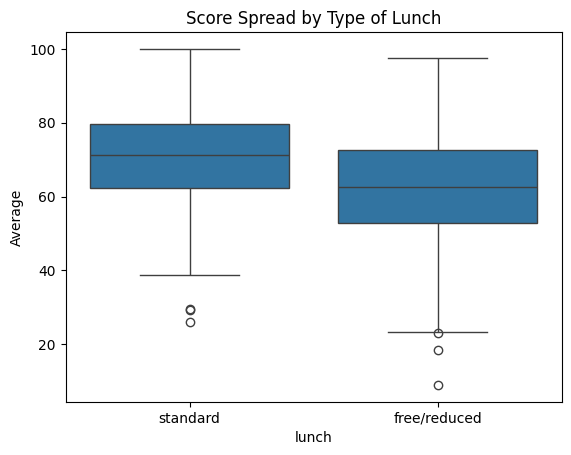

In [46]:
sns.boxplot(data=df, x='lunch', y='Average')
plt.title("Score Spread by Type of Lunch")
plt.show()

### Multivariate analysis using pairplot

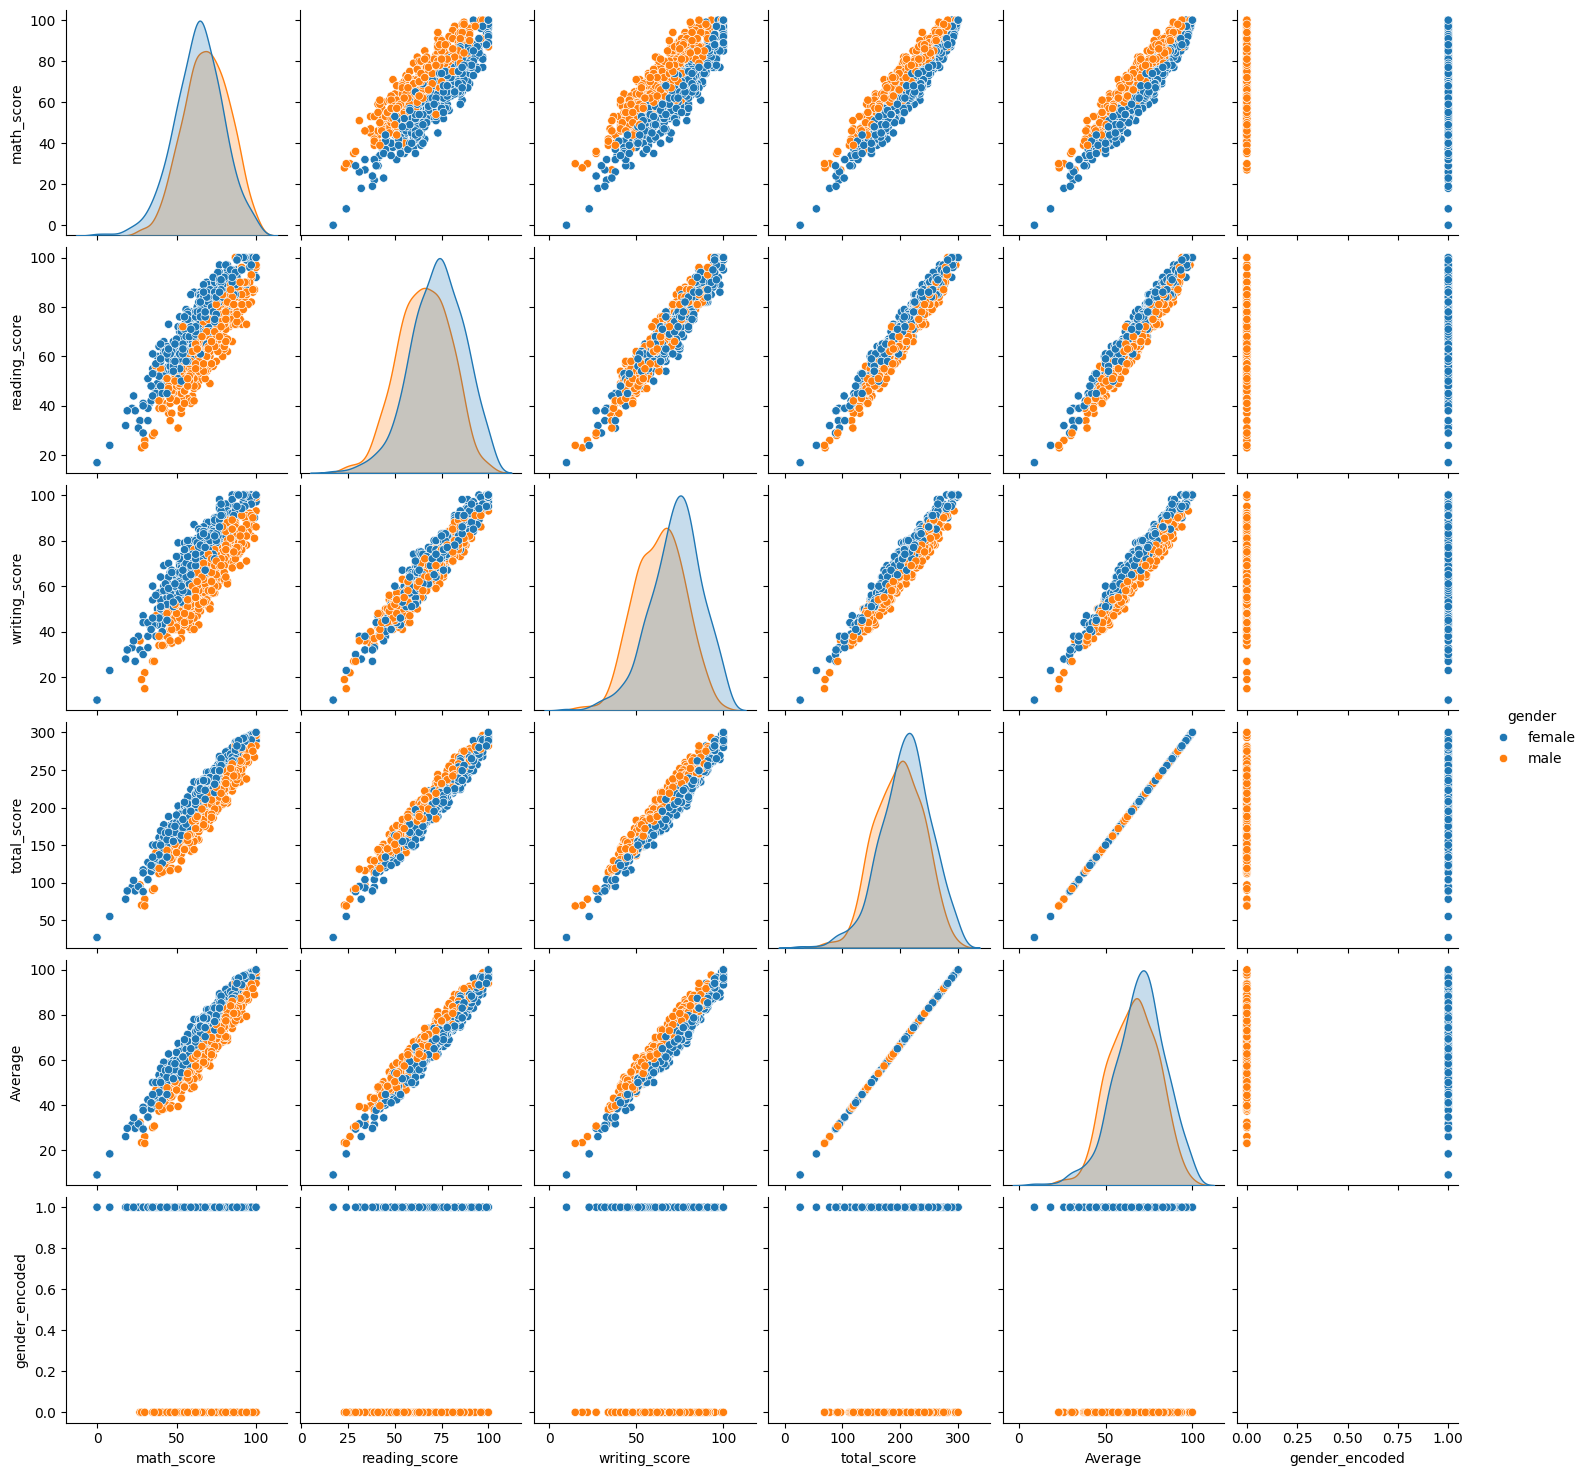

In [47]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights